###TIME SERIES EDA

In [67]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr # financial data
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
#df_tesla=pdr.get_data_yahoo('TSLA')
#df_tesla.to_csv('TSLA_stockprice.csv')
url='https://raw.githubusercontent.com/YigitAgalar/stock_price_time_series/main/TSLA_stockprice.csv'
df_tesla= pd.read_csv(url)

In [4]:
df_tesla.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1252,2022-10-25,224.350006,210.000000,210.100006,222.419998,96507900.0,222.419998
1253,2022-10-26,230.600006,218.199997,219.399994,224.639999,85012500.0,224.639999
1254,2022-10-27,233.809998,222.850006,229.770004,225.089996,61638800.0,225.089996
1255,2022-10-28,228.860001,216.350006,225.399994,228.520004,69039900.0,228.520004
1256,2022-10-31,229.839996,221.940002,226.190002,227.539993,60925818.0,227.539993


In [5]:
## Null check
df_tesla.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1257 non-null   int64  
 1   Date       1257 non-null   object 
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Open       1257 non-null   float64
 5   Close      1257 non-null   float64
 6   Volume     1257 non-null   float64
 7   Adj Close  1257 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 78.7+ KB


In [6]:
# Day count
print(f"This TSLA stock price data set has {len(df_tesla)} days")

This TSLA stock price data set has 1257 days


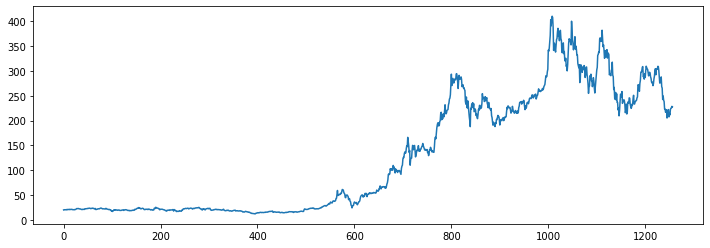

In [7]:
# Last 5 years of closing price plotted
df_tesla['Close'].plot(figsize=(12,4))

In [8]:
df_tesla.Date.max()

'2022-10-31'

## Feature Engineering

In [9]:
# Change % daily
df_tesla['Change%']=(df_tesla['Close'].divide(df_tesla.shift(1)['Close'])-1)*100
df_tesla['Change%']=df_tesla['Change%'].map(lambda x: 0 if pd.isnull(x) else x)

In [10]:
#moving average for 7 days
df_tesla['movavg7'] = df_tesla['Close'].rolling(window=7,min_periods=1).mean() #min_periods -> hesaplama yapmadan önce minimum kaç değer gerektiğini belirtiyor / ilk 6 satırda NaN valuedan kaçınmak için

In [11]:
#moving average for 30 days
df_tesla['movavg30'] = df_tesla['Close'].rolling(window=30,min_periods=1).mean()

In [12]:
#Exponential moving average (EMA)  -> En yeni datanın ağırlığı daha fazla
df_tesla['emovavg21'] = df_tesla['Close'].ewm(span=21).mean()  # -> The 21-day EMA places a 9.0% weight on the most recent price link:
#https://corporatefinanceinstitute.com/resources/equities/exponential-moving-average-ema/#:~:text=Calculating%20the%20Exponential%20Moving%20Average&text=The%2021%2Dday%20EMA%20places,those%20calculated%20over%20longer%20periods.

In [13]:
df_tesla.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close,Change%,movavg7,movavg30,emovavg21
0,2017-11-02,20.579332,19.508667,20.008667,19.950666,296871000.0,19.950666,0.000000,19.950666,19.950666,19.950666
1,2017-11-03,20.416668,19.675333,19.966667,20.406000,133410000.0,20.406000,2.282298,20.178333,20.178333,20.189175
2,2017-11-06,20.500000,19.934000,20.466667,20.185333,97290000.0,20.185333,-1.081382,20.180667,20.180667,20.187770
3,2017-11-07,20.433332,20.002001,20.068001,20.403334,79414500.0,20.403334,1.079994,20.236333,20.236333,20.249592
4,2017-11-08,20.459333,20.086666,20.366667,20.292667,70879500.0,20.292667,-0.542393,20.247600,20.247600,20.259922
5,2017-11-09,20.297333,19.753332,20.166668,20.199333,81706500.0,20.199333,-0.459941,20.239556,20.239556,20.247275
6,2017-11-10,20.557333,20.123333,20.166668,20.199333,69381000.0,20.199333,0.000000,20.233810,20.233810,20.238323
7,2017-11-13,21.120001,19.940666,20.008667,21.026667,113773500.0,21.026667,4.095845,20.387524,20.332917,20.372660
8,2017-11-14,21.090000,20.459999,21.000000,20.580000,85141500.0,20.580000,-2.124287,20.412381,20.360370,20.405389
9,2017-11-15,20.832666,20.100000,20.400667,20.753332,89680500.0,20.753332,0.842236,20.493524,20.399667,20.456868


Text(0, 0.5, 'Close Price')

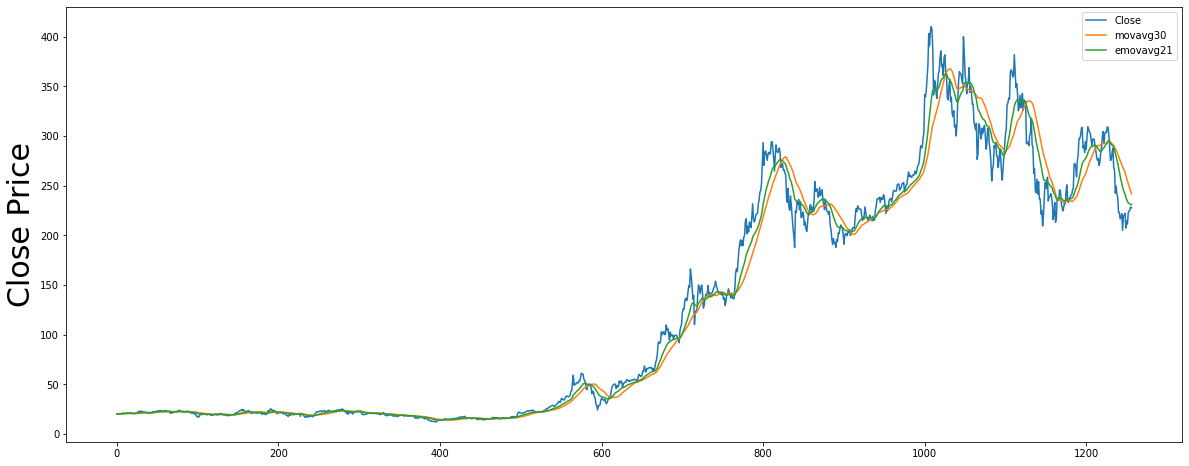

In [16]:
ax=df_tesla[['Close',"movavg30","emovavg21"]].plot(figsize=(20,8))

ax.set_ylabel("Close Price",fontsize=30)

## Stationary %Change Plotting

In [123]:
df_tesla['Change%'].sort_values(ascending=True)

715   -21.062824
593   -18.577806
566   -17.175839
595   -16.034404
227   -13.901537
         ...    
228    17.347133
496    17.669232
596    18.387684
840    19.641208
564    19.894859
Name: Change%, Length: 1257, dtype: float64

In [124]:
# worst crash 2020-09-08 TSLA first news  https://edition.cnn.com/2020/09/08/investing/tesla-stock-plunge/index.html
# best growth 2020-02-03 TSLA first news  https://www.cnbc.com/2020/02/03/tesla-stock-soars-hitting-700-per-share-for-the-first-time.html

Text(0, 0.5, 'Change')

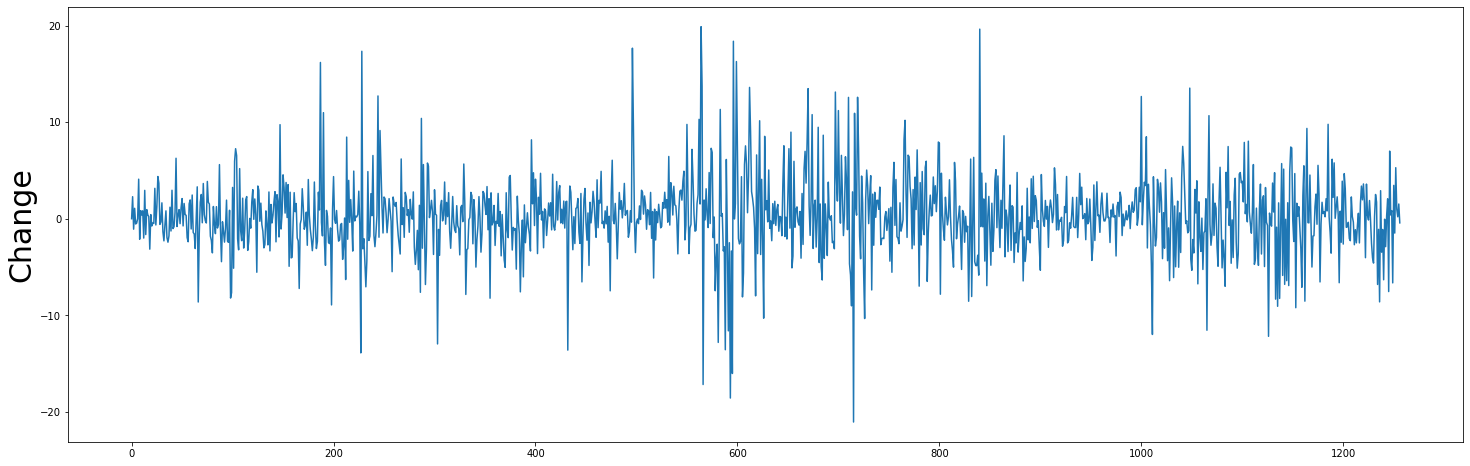

In [20]:
ax=df_tesla['Change%'].plot(figsize=(25,8))

ax.set_ylabel("Change",fontsize=30)

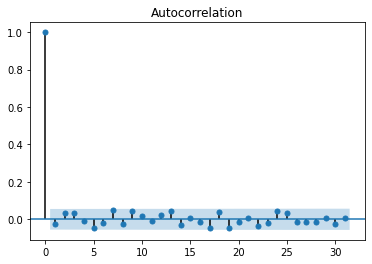

In [21]:
plot_acf(df_tesla['Change%'])
plt.show()

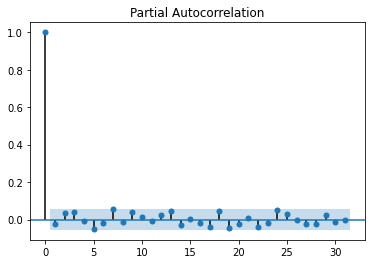

In [23]:
plot_pacf(df_tesla['Change%'])
plt.show()